In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from palettable.matplotlib import Inferno_20 as palette
%matplotlib inline
import re

In [54]:
file_loc = './otu_table_L4.txt'
with open(file_loc, 'r') as file:
    newfile = re.sub('D_0__Bacteria', 'Bact', file.read())
    newfile = re.sub('D_0__Archaea', 'Arch', newfile)
    newfile = re.sub('D_1__', 'P:', newfile)
    newfile = re.sub('D_2__', 'C:', newfile)
    newfile = re.sub('D_3__', 'O:', newfile)
    with open('./renamed_'+file_loc[-6:], 'w') as output:
        output.write(newfile)

In [55]:
df = pd.read_csv('./renamed_'+file_loc[-6:],
                 header=1,
                 index_col=0,
                 sep='\t')
df

,515rcbc32,515rcbc25,515rcbc16,515rcbc34,515rcbc29,515rcbc11,515rcbc31,515rcbc33,515rcbc10,515rcbc9,...,515rcbc14,515rcbc35,515rcbc18,515rcbc13,515rcbc36,515rcbc15,515rcbc24,515rcbc21,515rcbc26,515rcbc20
#OTU ID,,,,,,,,,,,,,,,,,,,,,
Arch;P:Crenarchaeota;C:Bathyarchaeia;Ambiguous_taxa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000010,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Arch;P:Diapherotrites;C:Micrarchaeia;O:uncultured archaeon,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000019,0.000000
Arch;P:Euryarchaeota;C:Methanobacteria;O:Methanobacteriales,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000030,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Arch;P:Euryarchaeota;C:Methanomicrobia;O:Methanocellales,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000045,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Arch;P:Euryarchaeota;C:Methanomicrobia;O:Methanomicrobiales,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Arch;P:Euryarchaeota;C:Methanomicrobia;O:Methanosarcinales,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000005,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Arch;P:Euryarchaeota;C:Thermoplasmata;O:Marine Group II,0.000000,0.000000,0.000000,0.000000,0.000018,0.000000,0.000000,0.000000,0.000000,0.000015,...,0.000008,0.000057,0.000070,0.000000,0.000000,0.000037,0.000000,0.000000,0.000167,0.000000
Arch;P:Euryarchaeota;C:Thermoplasmata;O:Methanomassiliicoccales,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000005,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000005,0.000000,0.000000,0.000000
Arch;P:Nanoarchaeaeota;C:Woesearchaeia;O:Candidatus Nomurabacteria bacterium RIFCSPLOWO2_02_FULL_42_17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000009,0.000000,0.000000


In [56]:
df = pd.read_csv('./renamed_'+file_loc[-6:],
                 header=1,
                 index_col=0,
                 sep='\t')
cols = []
for num in range(8,38):
    cols.append('515rcbc' + str(num))
df = df[cols]
df = df*100
df['mean'] = df.mean(axis=1)
df.sort_values('mean', ascending=False, inplace=True)
df.drop("mean",
        axis=1, 
        inplace=True)
df

,515rcbc8,515rcbc9,515rcbc10,515rcbc11,515rcbc12,515rcbc13,515rcbc14,515rcbc15,515rcbc16,515rcbc17,...,515rcbc28,515rcbc29,515rcbc30,515rcbc31,515rcbc32,515rcbc33,515rcbc34,515rcbc35,515rcbc36,515rcbc37
#OTU ID,,,,,,,,,,,,,,,,,,,,,
Bact;P:Verrucomicrobia;C:Verrucomicrobiae;O:Chthoniobacterales,7.030786,7.373765,6.407583,10.262644,4.541103,4.556496,15.694805,4.788925,12.096700,6.966645,...,11.299082,6.672468,6.627088,8.286283,10.249870,18.395391,5.836520,1.757764,2.427171,5.153831
Bact;P:Proteobacteria;C:Alphaproteobacteria;O:Rhizobiales,5.817845,5.978850,5.634273,8.058347,4.995025,6.080911,6.667628,6.835178,5.830389,8.404324,...,6.013048,6.100576,4.920535,8.815743,6.937360,8.662032,8.916372,5.682153,5.875447,7.323782
Bact;P:Proteobacteria;C:Gammaproteobacteria;O:Betaproteobacteriales,7.683543,4.419740,6.669731,6.335191,10.325181,6.260156,4.160658,3.476481,4.927943,3.596045,...,4.040220,4.158065,7.614588,5.727227,7.149187,3.723455,4.337392,6.710535,12.449832,7.384547
Bact;P:Bacteroidetes;C:Bacteroidia;O:Chitinophagales,3.781243,4.324837,4.030735,5.184726,10.871541,5.275149,5.763068,2.639844,5.658907,2.974222,...,4.429754,3.958233,2.463218,5.697552,3.982578,3.750119,3.155049,1.381747,5.094602,4.931559
Bact;P:Acidobacteria;C:Subgroup 6;O:uncultured bacterium,3.130860,3.705712,4.724142,3.397485,3.208312,6.757685,3.906676,5.391864,3.508742,4.578213,...,5.200146,3.996039,4.143221,5.421889,4.343550,3.237787,5.199750,4.393277,1.135774,3.733849
Bact;P:Proteobacteria;C:Deltaproteobacteria;O:Myxococcales,3.016924,3.374307,2.896219,3.988485,3.952524,4.754167,3.758453,3.891527,3.883462,3.522129,...,3.923967,4.770163,2.683727,4.127914,3.389244,3.852014,3.892613,3.377353,1.676359,3.725854
Bact;P:Actinobacteria;C:Thermoleophilia;O:Gaiellales,3.301764,3.282417,4.209697,3.257110,0.912886,2.281598,4.075730,8.272884,3.558396,6.405802,...,3.291517,4.284686,4.395442,2.132677,3.329803,4.798591,5.306945,2.435047,0.603380,3.209351
Bact;P:Acidobacteria;C:Subgroup 6;Ambiguous_taxa,3.297016,2.937455,4.828126,3.854213,3.853296,3.742357,2.564657,3.552199,3.502968,3.616373,...,4.167751,3.378541,3.676389,3.919410,5.102239,2.726407,3.169448,3.843976,1.138504,3.297301
Bact;P:Verrucomicrobia;C:Verrucomicrobiae;O:Pedosphaerales,3.242422,3.987407,4.047154,2.567441,3.730067,3.482704,3.948338,1.464815,4.199866,2.161138,...,4.463589,2.505401,3.696301,1.422826,4.873119,2.819731,2.484681,2.488278,2.236055,2.919918


In [101]:
def plot_heatmap(dataframe, title=False, savename=False, dpi=100, figsize=(30,150)):
    matplotlib.rcParams.update({'font.size': 28})
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(ax=ax, 
                data=dataframe,
                yticklabels=True, 
                cbar=True)
    for label in ax.get_yticklabels():
        label.set_size(30)
    if title:
        plt.title(title, fontsize=40)
    plt.ylabel('')
    plt.xlabel('')
    if savename:
        plt.savefig(savename, 
                    bbox_inches='tight', 
                    dpi=dpi)
    plt.show()


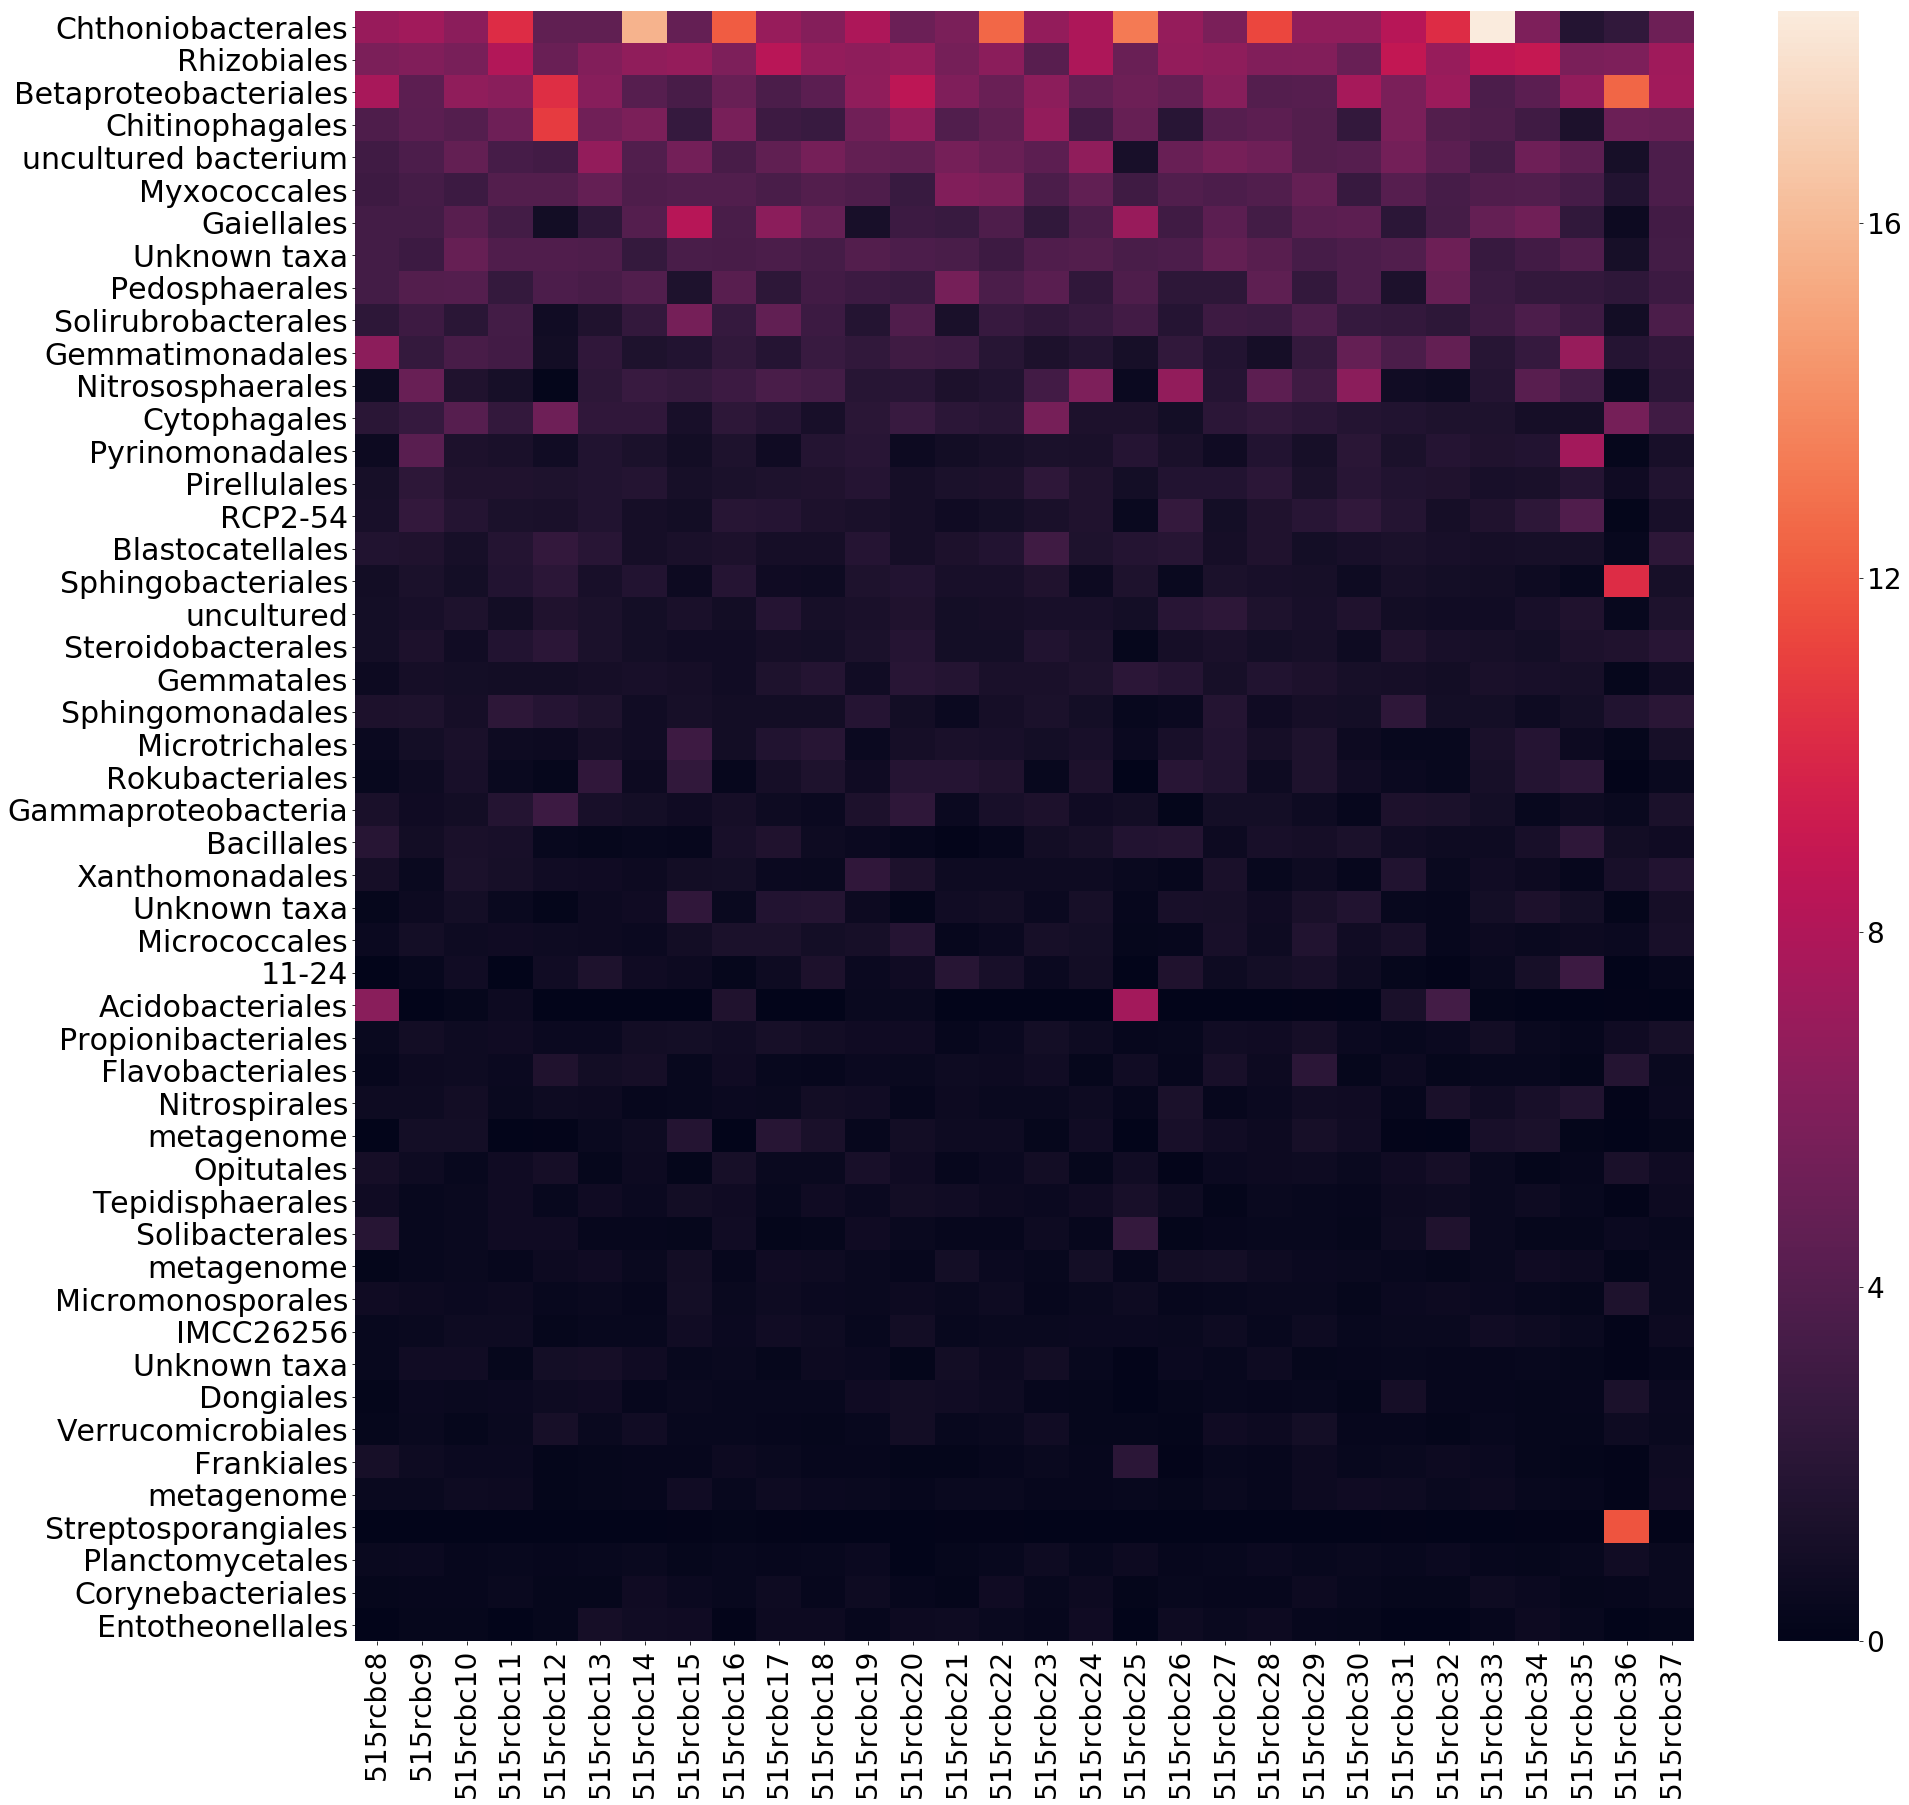

In [102]:
df = pd.read_csv('./renamed_'+file_loc[-6:],
                 header=1,
                 index_col=0,
                 sep='\t')
cols = []
for num in range(8,38):
    cols.append('515rcbc' + str(num))
df = df[cols]
df = df*100
df['mean'] = df.mean(axis=1)
df.sort_values('mean', ascending=False, inplace=True)
df.drop("mean",
        axis=1, 
        inplace=True)
df_trunc = df[:50]
newind = {}
for item in df_trunc.index:
    try:
        newname = item.split(';O:')[1]
    except:
        newname = "Unknown taxa"
    if len(newname) > 20:
        newname = newname.split(" ")[0]
    newind[item] = newname
df_trunc.rename(index=newind)
plot_heatmap(df_trunc.rename(index=newind),dpi=50,figsize=(30,30))

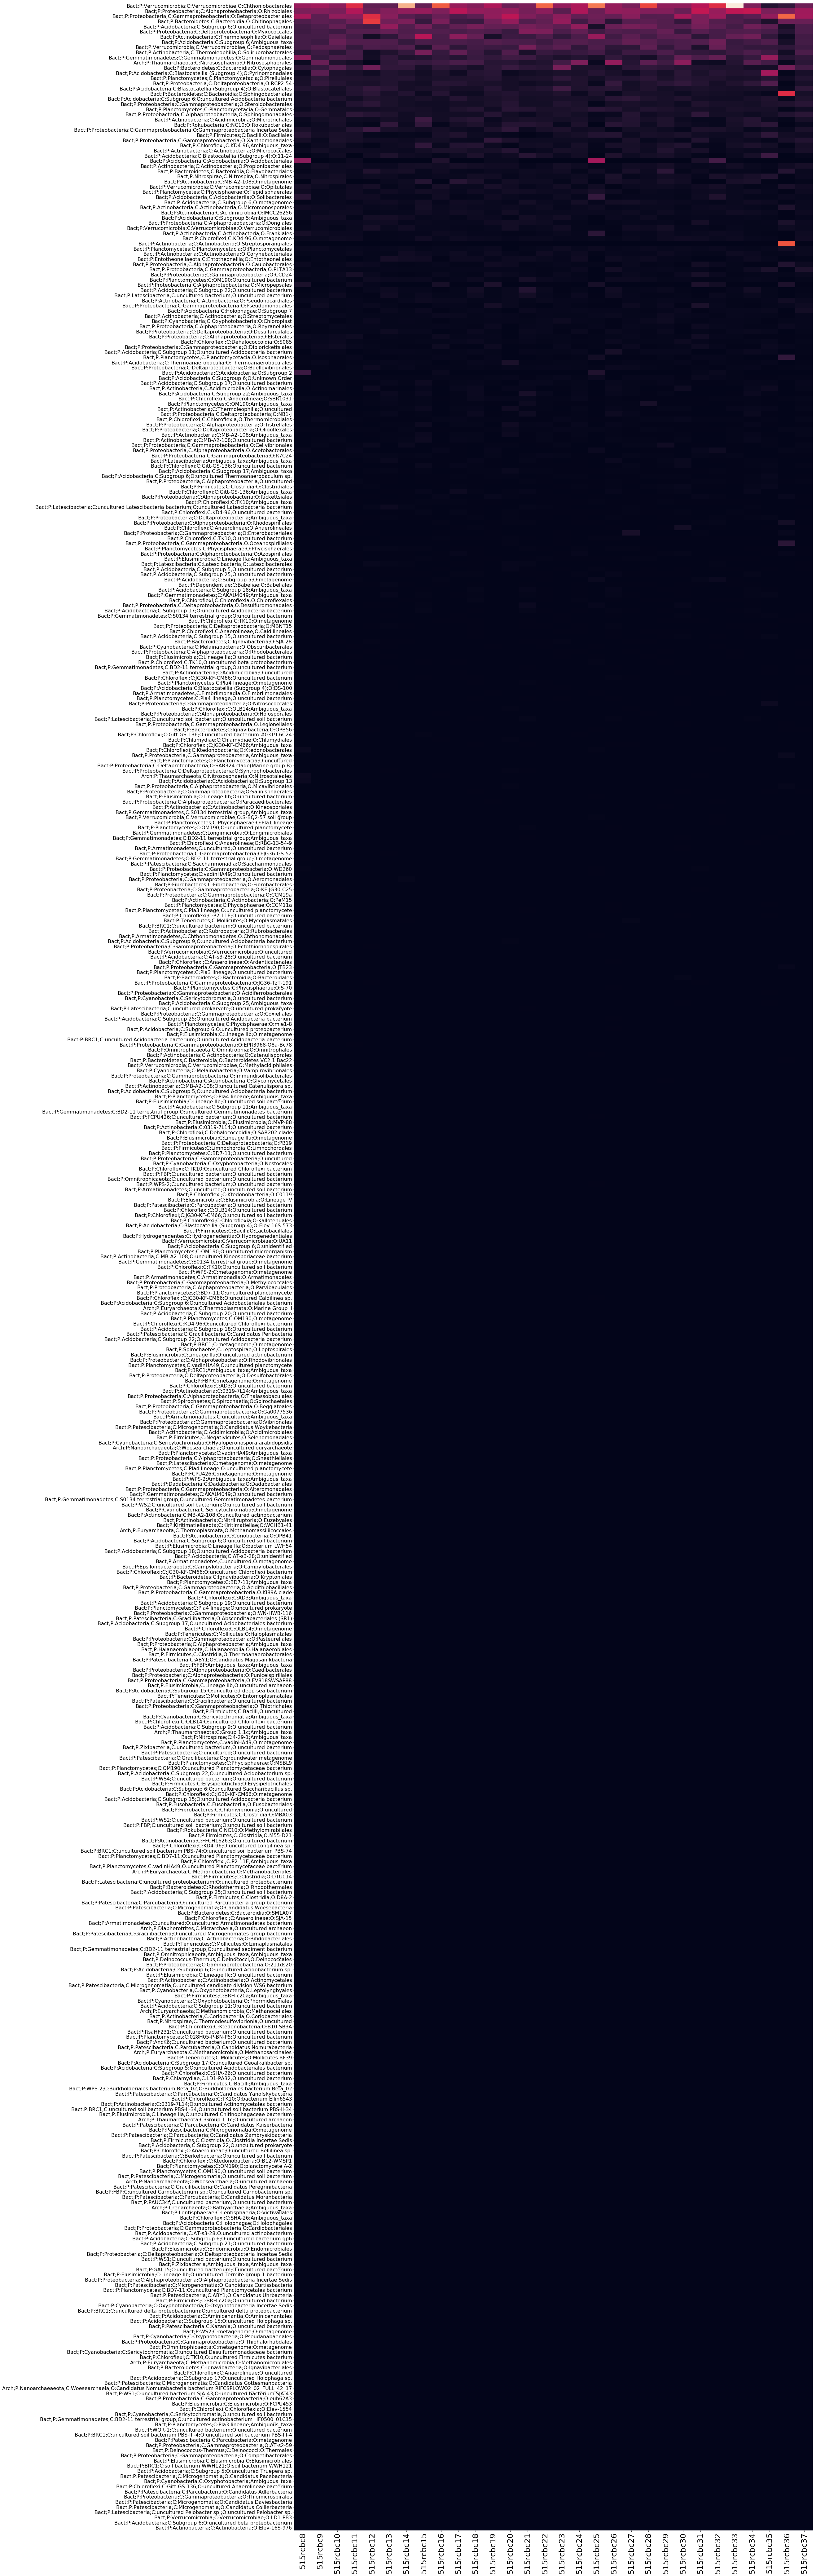

In [58]:
plot_heatmap(df, 
             savename='./L4_plot.png', 
             dpi=50)

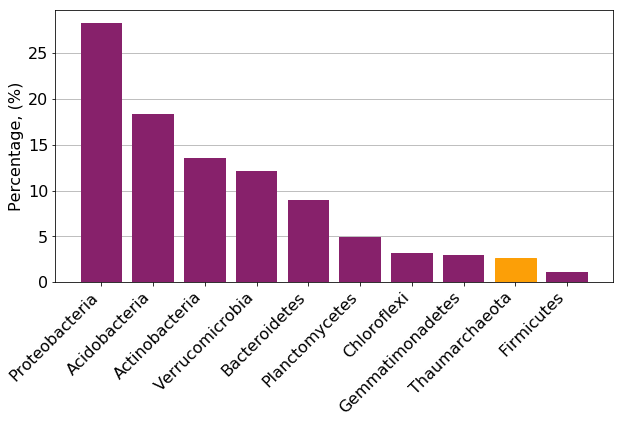

96.15649639907794


In [8]:
tax = pd.read_csv('../taxonomy/renamed_L2.txt', 
                  header=1, 
                  index_col=0,
                  sep='\t')
cols = []
for num in range(8,38):
    cols.append('515rcbc' + str(num))
tax = tax[cols]
tax = tax*100
tax['total'] = tax.sum(axis=1)
tax['total_perc'] = tax[['total']]*100/tax[['total']].sum()
top = tax[['total_perc']].sum(axis=1).sort_values(ascending=False)[:10]
def plot_tax(ser):
    matplotlib.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots(figsize=(10,5))
    val = ser.values
    xlabels = []
    for phyl in ser.index.tolist():
        xlabels.append(phyl.split(';P:')[1])
    bars = ax.bar(xlabels,val, color=palette.hex_colors[7])
    bars[8].set_color(palette.hex_colors[15])
    ax.set_xticklabels(xlabels)
    plt.ylabel('Percentage, (%)', fontsize=16)
    plt.xticks(rotation=45, fontsize=16, ha='right')
    ax.set_axisbelow(True)
    plt.grid(axis='y')
    plt.savefig('./top_10.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(val.sum())
plot_tax(top)

In [84]:
df_trunc.rename(index=newind)

,515rcbc8,515rcbc9,515rcbc10,515rcbc11,515rcbc12,515rcbc13,515rcbc14,515rcbc15,515rcbc16,515rcbc17,...,515rcbc28,515rcbc29,515rcbc30,515rcbc31,515rcbc32,515rcbc33,515rcbc34,515rcbc35,515rcbc36,515rcbc37
#OTU ID,,,,,,,,,,,,,,,,,,,,,
Chthoniobacterales,7.030786,7.373765,6.407583,10.262644,4.541103,4.556496,15.694805,4.788925,12.096700,6.966645,...,11.299082,6.672468,6.627088,8.286283,10.249870,18.395391,5.836520,1.757764,2.427171,5.153831
Rhizobiales,5.817845,5.978850,5.634273,8.058347,4.995025,6.080911,6.667628,6.835178,5.830389,8.404324,...,6.013048,6.100576,4.920535,8.815743,6.937360,8.662032,8.916372,5.682153,5.875447,7.323782
Betaproteobacteriales,7.683543,4.419740,6.669731,6.335191,10.325181,6.260156,4.160658,3.476481,4.927943,3.596045,...,4.040220,4.158065,7.614588,5.727227,7.149187,3.723455,4.337392,6.710535,12.449832,7.384547
Chitinophagales,3.781243,4.324837,4.030735,5.184726,10.871541,5.275149,5.763068,2.639844,5.658907,2.974222,...,4.429754,3.958233,2.463218,5.697552,3.982578,3.750119,3.155049,1.381747,5.094602,4.931559
uncultured bacterium,3.130860,3.705712,4.724142,3.397485,3.208312,6.757685,3.906676,5.391864,3.508742,4.578213,...,5.200146,3.996039,4.143221,5.421889,4.343550,3.237787,5.199750,4.393277,1.135774,3.733849
Myxococcales,3.016924,3.374307,2.896219,3.988485,3.952524,4.754167,3.758453,3.891527,3.883462,3.522129,...,3.923967,4.770163,2.683727,4.127914,3.389244,3.852014,3.892613,3.377353,1.676359,3.725854
Gaiellales,3.301764,3.282417,4.209697,3.257110,0.912886,2.281598,4.075730,8.272884,3.558396,6.405802,...,3.291517,4.284686,4.395442,2.132677,3.329803,4.798591,5.306945,2.435047,0.603380,3.209351
Unknown taxa,3.297016,2.937455,4.828126,3.854213,3.853296,3.742357,2.564657,3.552199,3.502968,3.616373,...,4.167751,3.378541,3.676389,3.919410,5.102239,2.726407,3.169448,3.843976,1.138504,3.297301
Pedosphaerales,3.242422,3.987407,4.047154,2.567441,3.730067,3.482704,3.948338,1.464815,4.199866,2.161138,...,4.463589,2.505401,3.696301,1.422826,4.873119,2.819731,2.484681,2.488278,2.236055,2.919918


In [90]:
newind = {}
for item in df_trunc.index:
    try:
        newname = item.split(';O:')[1]
    except:
        newname = "Unknown taxa"
    if len(newname) > 20:
        newname = newname.split(" ")[0]
    newind[item] = newname

In [91]:
newind

{'Bact;P:Verrucomicrobia;C:Verrucomicrobiae;O:Chthoniobacterales': 'Chthoniobacterales',
 'Bact;P:Proteobacteria;C:Alphaproteobacteria;O:Rhizobiales': 'Rhizobiales',
 'Bact;P:Proteobacteria;C:Gammaproteobacteria;O:Betaproteobacteriales': 'Betaproteobacteriales',
 'Bact;P:Bacteroidetes;C:Bacteroidia;O:Chitinophagales': 'Chitinophagales',
 'Bact;P:Acidobacteria;C:Subgroup 6;O:uncultured bacterium': 'uncultured bacterium',
 'Bact;P:Proteobacteria;C:Deltaproteobacteria;O:Myxococcales': 'Myxococcales',
 'Bact;P:Actinobacteria;C:Thermoleophilia;O:Gaiellales': 'Gaiellales',
 'Bact;P:Acidobacteria;C:Subgroup 6;Ambiguous_taxa': 'Unknown taxa',
 'Bact;P:Verrucomicrobia;C:Verrucomicrobiae;O:Pedosphaerales': 'Pedosphaerales',
 'Bact;P:Actinobacteria;C:Thermoleophilia;O:Solirubrobacterales': 'Solirubrobacterales',
 'Bact;P:Gemmatimonadetes;C:Gemmatimonadetes;O:Gemmatimonadales': 'Gemmatimonadales',
 'Arch;P:Thaumarchaeota;C:Nitrososphaeria;O:Nitrososphaerales': 'Nitrososphaerales',
 'Bact;P:Bactero

In [86]:
l=['a','b','c']
l

['a', 'b', 'c']

In [88]:
l[:20]

['a', 'b', 'c']